# Students Performance in Exams

## Marks secured by the students in various subjects

#### in this kernel I will try to predict what will be the avgrage of a student in three tests

### Import all the necessary libraries

In [66]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
# allow plots to appear within the notebook
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split,cross_val_score
from sklearn import preprocessing
from sklearn import metrics
# from sklearn.preprocessing import MinMaxScaler

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor


import warnings
warnings.filterwarnings("ignore")

## import the data

In [67]:
data = pd.read_csv('StudentsPerformance.csv')

### View the first fields in the table

In [68]:
data.head(7)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92


Let's add a column that shows the average of each student

In [69]:
data = data.assign(average= lambda x: ((x['math score'] + x['reading score'] + x['writing score'])/3.0))

In [70]:
data.head(7)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333
5,female,group B,associate's degree,standard,none,71,83,78,77.333333
6,female,group B,some college,standard,completed,88,95,92,91.666667


In [71]:
data.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score', 'average'],
      dtype='object')

### searching for null data

In [72]:
data.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
average                        0
dtype: int64

We have not received any field that is null so we do not have to delete anything

## The avrage of the three tests

In [73]:
data.describe().iloc[1]

math score       66.089000
reading score    69.169000
writing score    68.054000
average          67.770667
Name: mean, dtype: float64

## analyze the features

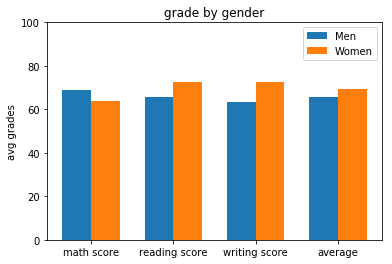

,math score,reading score,writing score,average
gender,,,,
female,63.633205,72.608108,72.467181,69.569498
male,68.728216,65.473029,63.311203,65.837483


In [74]:
Male = np.array(data.groupby('gender').mean())[1]
Female = np.array(data.groupby('gender').mean())[0]

width = 0.35
ind = np.arange(4)

plt.bar(ind, Male, width, label='Men')
plt.bar(ind + width, Female, width, label='Women')

plt.ylim(0,100)
plt.ylabel('avg grades')
plt.title('grade by gender')
plt.xticks(ind + width / 2 ,('math score','reading score','writing score','average'))
plt.legend(loc='best')
plt.show()

data.groupby('gender').mean()

As we can see, Female students perform better than Male students. Of course, in Maths, Male students outperform Female Students.

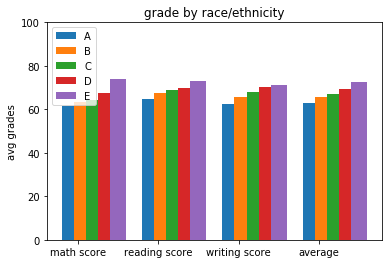

,math score,reading score,writing score,average
race/ethnicity,,,,
group A,61.629213,64.674157,62.674157,62.992509
group B,63.452632,67.352632,65.600000,65.468421
group C,64.463950,69.103448,67.827586,67.131661
group D,67.362595,70.030534,70.145038,69.179389
group E,73.821429,73.028571,71.407143,72.752381


In [75]:
group_A = np.array(data.groupby('race/ethnicity').mean())[0]
group_B = np.array(data.groupby('race/ethnicity').mean())[1]
group_C = np.array(data.groupby('race/ethnicity').mean())[2]
group_D = np.array(data.groupby('race/ethnicity').mean())[3]
group_E = np.array(data.groupby('race/ethnicity').mean())[4]

width = 0.20
barWidth = 0.15
r1 = np.arange(len(group_A))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5 = [x + barWidth for x in r4]

plt.bar(r1, group_A, width, label='A')
plt.bar(r2, group_B, width, label='B')
plt.bar(r3, group_C, width, label='C')
plt.bar(r4, group_D, width, label='D')
plt.bar(r5, group_E, width, label='E')

plt.ylim(0,100)
plt.ylabel('avg grades')
plt.title('grade by race/ethnicity')
plt.xticks(ind + width / 2 ,('math score','reading score','writing score', 'average'))
plt.legend(loc='best')
plt.show()

data.groupby('race/ethnicity').mean()

As we can see group E perform much better than other groups and as the groups approach to 'A', the average grade is reduced

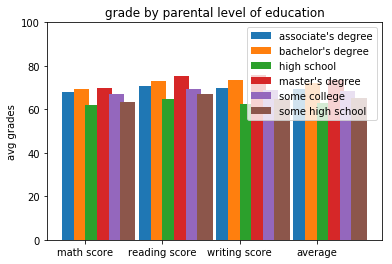

,math score,reading score,writing score,average
parental level of education,,,,
associate's degree,67.882883,70.927928,69.896396,69.569069
bachelor's degree,69.389831,73.000000,73.381356,71.923729
high school,62.137755,64.704082,62.448980,63.096939
master's degree,69.745763,75.372881,75.677966,73.598870
some college,67.128319,69.460177,68.840708,68.476401
some high school,63.497207,66.938547,64.888268,65.108007


In [76]:
associates_degree = np.array(data.groupby('parental level of education').mean())[0]
bachelors_degree = np.array(data.groupby('parental level of education').mean())[1]
high_school = np.array(data.groupby('parental level of education').mean())[2]
masters_degree = np.array(data.groupby('parental level of education').mean())[3]
some_college = np.array(data.groupby('parental level of education').mean())[4]
some_high_school = np.array(data.groupby('parental level of education').mean())[5]

width = 0.20
barWidth = 0.15
r1 = np.arange(len(associates_degree))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5 = [x + barWidth for x in r4]
r6 = [x + barWidth for x in r5]

plt.bar(r1, associates_degree, width, label="associate's degree")
plt.bar(r2, bachelors_degree, width, label="bachelor's degree")
plt.bar(r3, high_school, width, label='high school')
plt.bar(r4, masters_degree, width, label="master's degree")
plt.bar(r5, some_college, width, label='some college')
plt.bar(r6, some_high_school, width, label='some high school')

plt.ylim(0,100)
plt.ylabel('avg grades')
plt.title('grade by parental level of education')
plt.xticks(ind + width ,('math score','reading score','writing score','average'))
plt.legend(loc='best')
plt.show()

data.groupby('parental level of education')
data.groupby('parental level of education').mean()

here we can see the grade by parental level of education thar the highest averge belong to "master's degree" and the lowest belong to "high school" 

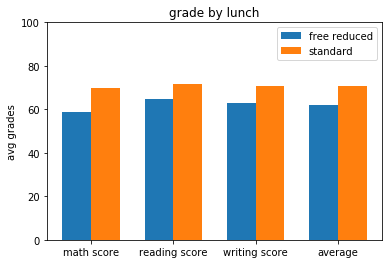

,math score,reading score,writing score,average
lunch,,,,
free/reduced,58.921127,64.653521,63.022535,62.199061
standard,70.034109,71.654264,70.823256,70.837209


In [77]:
free_reduced = np.array(data.groupby('lunch').mean())[0]
standard = np.array(data.groupby('lunch').mean())[1]

width = 0.35
ind = np.arange(4)

plt.bar(ind, free_reduced, width, label='free reduced')
plt.bar(ind + width, standard, width, label='standard')

plt.ylim(0,100)
plt.ylabel('avg grades')
plt.title('grade by lunch')
plt.xticks(ind + width / 2 ,('math score','reading score','writing score','average'))
plt.legend(loc='best')
plt.show()

data.groupby('lunch').mean()

note that student who get's lunch in standard price has higher grades

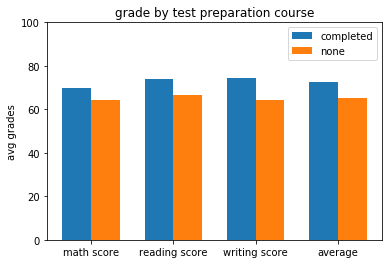

,math score,reading score,writing score,average
test preparation course,,,,
completed,69.695531,73.893855,74.418994,72.669460
none,64.077882,66.534268,64.504673,65.038941


In [78]:
completed = np.array(data.groupby('test preparation course').mean())[0]
none = np.array(data.groupby('test preparation course').mean())[1]

width = 0.35
ind = np.arange(4)

plt.bar(ind, completed, width, label='completed')
plt.bar(ind + width, none, width, label='none')

plt.ylim(0,100)
plt.ylabel('avg grades')
plt.title('grade by test preparation course')
plt.xticks(ind + width / 2 ,('math score','reading score','writing score','average'))
plt.legend(loc='best')
plt.show()

data.groupby('test preparation course').mean()

note that student who did test preparation course has higher grades

### Conclusions:
- If you are a female it more likely to you to have better grades
- The higher you belong to a group ('A' to 'E'),is the more likely to you to get higher grades
- If we talk about masters degree, students get higher grades than the rest of the parental level of education. I might think that this is because the student is more mature and responsible at this point of life
- It can be concluded that a student who pays a stundard price lunch seems to have better social conditions that are expressed in his grades
- student who take a test preparation course seem to has better grades

## Feature Selection

I decided not to drop any feature because there are not so many features in the table anyway and I thinking that all the feature can help us to get a better predict

## Feature Encoding

In [79]:
# encode all the categorical features.
def transform(feature):
    data[feature]=preprocessing.LabelEncoder().fit_transform(data[feature])
cat = data.select_dtypes(include='object')
for col in cat.columns:
    transform(col)

this fancation takes all the string objects and encoding them to number

In [80]:
data.head(7)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average
0,0,1,1,1,1,72,72,74,72.666667
1,0,2,4,1,0,69,90,88,82.333333
2,0,1,3,1,1,90,95,93,92.666667
3,1,0,0,0,1,47,57,44,49.333333
4,1,2,4,1,1,76,78,75,76.333333
5,0,1,0,1,1,71,83,78,77.333333
6,0,1,4,1,0,88,95,92,91.666667


## Splitting the data into training and testing set

Feature Scaling didn't effect the result so I decided to do it without scaling

In [81]:
# scaler=MinMaxScaler()
# X=scaler.fit_transform(data[feature_cols])
# y=data['average'].as_matrix()

In [82]:
feature_cols = ['gender','race/ethnicity','parental level of education','lunch','test preparation course']
X = data[feature_cols]
y = data['average']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=4)

## Making predictions using LinearRegression model

In [83]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

### pair the feature names with the coefficients


In [84]:
list(zip(feature_cols, lin_reg.coef_))

[('gender', -4.14041557172906),
 ('race/ethnicity', 2.4891304102044325),
 ('parental level of education', -0.39272256981629694),
 ('lunch', 7.801409525817282),
 ('test preparation course', -6.578784633582265)]

### The prediction:

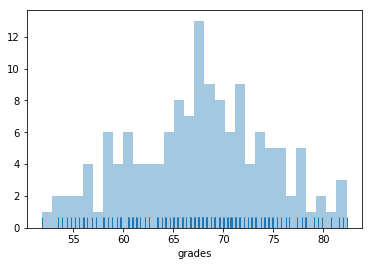

In [85]:
test_predict = lin_reg.predict(X_test)
unique = np.unique(test_predict, return_counts=False)
result = pd.DataFrame({'grades':unique})
sns.distplot(result['grades'],rug=True,bins=30, kde=False)

### error of the model:

In [86]:
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,test_predict))
# print(' Mean Squared Error:',metrics.mean_squared_error(y_test,test_predict))
# print('Root Mean Squared Error:',np.sqrt(metrics.mean_absolute_error(y_test,test_predict)))

Mean Absolute Error: 10.27722663906651


### cross-validation

In [87]:
scores = np.sqrt(-cross_val_score(lin_reg, X, y, cv=10, scoring='neg_mean_squared_error'))
print(scores.mean())

12.757235151570795


## Making predictions using DecisionTreeRegressor model 

In [88]:
dtr = DecisionTreeRegressor(min_samples_split=20)
dtr.fit(X_train,y_train)
test_predict = dtr.predict(X_test)

### The prediction:

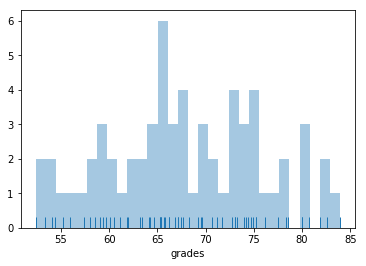

In [89]:
unique = np.unique(test_predict, return_counts=False)
result = pd.DataFrame({'grades':unique})
sns.distplot(result['grades'],rug=True,bins=30, kde=False)

### error of the model:

In [90]:
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,test_predict))
# print(' Mean Squared Error:',metrics.mean_squared_error(y_test,test_predict))
# print('Root Mean Squared Error:',np.sqrt(metrics.mean_absolute_error(y_test,test_predict)))

Mean Absolute Error: 10.719206028440084


### cross-validation:

In [91]:
scores = np.sqrt(-cross_val_score(dtr, X, y, cv=10, scoring='neg_mean_squared_error'))
print(scores.mean())

13.654142645113652


## Conclusion

There is no much difference between the two models but the LinearRegression model is a little better